[View in Colaboratory](https://colab.research.google.com/github/ozanpekmezci/capstone/blob/master/Digit_Recognition.ipynb)

# Recognition of Digits from Images
This notebook serves as the first step of the project that recognizes house numbers from live camera image. In this first step, MNIST database is used.

## VIsualise Data
This function visualises data to check the algorithm gets.

In [0]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

def visualize(train, test):

  train_digits = Counter(train.flatten())
  test_digits = Counter(test.flatten())

  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

  ax1.bar(train_digits.keys(), train_digits.values(), align='center')
  ax1.set_xticks(train_digits.keys())
  ax1.set_title('Train')
  ax1.set_xlabel('Labels')

  ax2.bar(test_digits.keys(), test_digits.values(), align='center')
  ax2.set_xticks(test_digits.keys())
  ax2.set_title('Test')
  ax2.set_xlabel('Labels')

  plt.show()


## Build Model
Build and train model to calculate accuracy.

Using TensorFlow backend.


11501568/11490434 [==============================] - 4s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


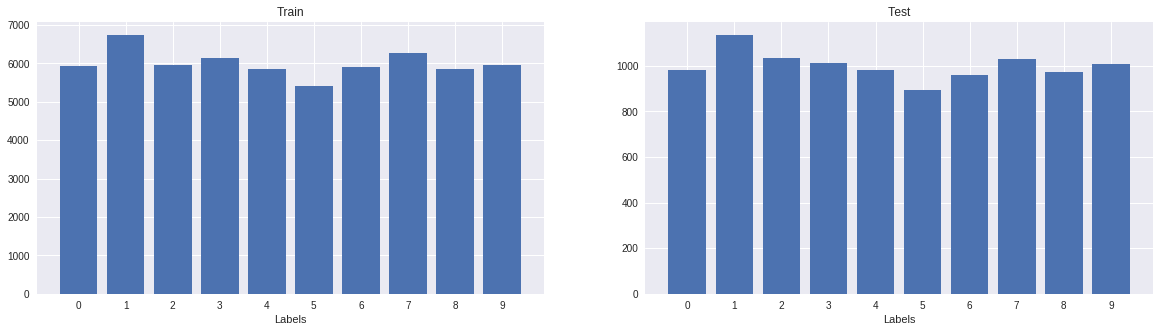

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.2712 - acc: 0.9169 - val_loss: 0.0657 - val_acc: 0.9775
Epoch 2/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0933 - acc: 0.9725 - val_loss: 0.0408 - val_acc: 0.9860
Epoch 3/12
29184/60000 [=============>................] - ETA: 4s - loss: 0.0722 - acc: 0.9783

60000/60000 [==============================] - 10s 165us/step - loss: 0.0698 - acc: 0.9793 - val_loss: 0.0365 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0567 - acc: 0.9834 - val_loss: 0.0344 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0499 - acc: 0.9847 - val_loss: 0.0322 - val_acc: 0.9898
Epoch 6/12
  896/60000 [..............................] - ETA: 9s - loss: 0.0415 - acc: 0.9888 

60000/60000 [==============================] - 10s 163us/step - loss: 0.0409 - acc: 0.9876 - val_loss: 0.0302 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0385 - acc: 0.9884 - val_loss: 0.0296 - val_acc: 0.9907
Epoch 8/12
55040/60000 [==========================>...] - ETA: 0s - loss: 0.0358 - acc: 0.9888

60000/60000 [==============================] - 10s 163us/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0265 - val_acc: 0.9910
Epoch 9/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0332 - acc: 0.9898 - val_loss: 0.0267 - val_acc: 0.9915
Epoch 10/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0301 - acc: 0.9910 - val_loss: 0.0259 - val_acc: 0.9913
Epoch 11/12
 4736/60000 [=>............................] - ETA: 8s - loss: 0.0314 - acc: 0.9913

60000/60000 [==============================] - 10s 164us/step - loss: 0.0290 - acc: 0.9914 - val_loss: 0.0259 - val_acc: 0.9921
Epoch 12/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0282 - acc: 0.9915 - val_loss: 0.0258 - val_acc: 0.9917
Test loss: 0.025803594979401896
Test accuracy: 0.9917


In [2]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

visualize(y_train, y_test)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Upload file
Adds ability to upload images to Google Colab for predicting images manually.

In [5]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving 1.png to 1.png
User uploaded file "1.png" with length 4861 bytes


In [7]:
import cv2
import numpy
img = cv2.imread('1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (img_cols, img_rows))
arr = numpy.array(img_gray).reshape((img_cols,img_rows,1))
arr = numpy.expand_dims(arr, axis=0)
prediction = model.predict(arr)
print(prediction)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
